<a href="https://colab.research.google.com/github/Aikhusy/PCVK/blob/master/Week_7_Konvultion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

KONVOLULSI

SYAIKHUL SHAFWAN R

2141720105

29


TI 3D

In [5]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im

In [7]:
def convolution2d(image,kernel,stride,padding):
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape

    # Pad the image with zeros to account for the kernel size.
    padded_image = np.zeros((image_height + kernel_height - 1, image_width + kernel_width - 1))
    padded_image[kernel_height // padding:image_height + kernel_height // padding, kernel_width // padding:image_width + kernel_width // padding] = image

    # Convolve the image with the kernel.
    convolved_image = np.zeros((image_height, image_width))
    for i in range(image_height):
      for j in range(image_width):
        convolved_image[i, j] = np.sum(padded_image[i*stride:i*stride + kernel_height, j*stride:j*stride + kernel_width] * kernel)

    return convolved_image

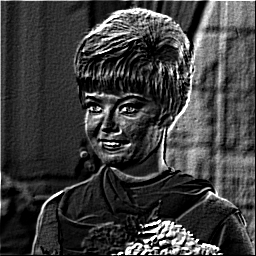

In [9]:
img = cv.imread('/content/drive/MyDrive/PCVK/female.tiff')
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

kernel = np.array([[-2, -1, 0],
                    [-1, 1, 1],
                    [0, 1, 2]])

convolved_image = convolution2d(img_gray, kernel, 1, 2)
cv2_imshow(convolved_image)


SHARPEN IMAGE

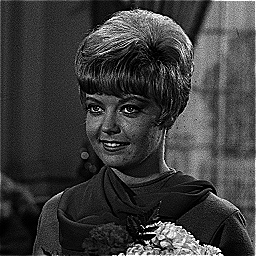

In [11]:

kernel = np.array([[0, -1, 0],
                    [-1, 5, -1],
                    [0, -1, 0]])

convolved_image = convolution2d(img_gray, kernel, 1, 2)

cv2_imshow(convolved_image)

EMBOSS IMAGE

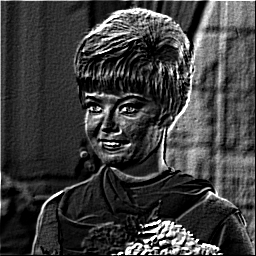

In [13]:
kernel = np.array([[-2, -1, 0],
                    [-1, 1, 1],
                    [0, 1, 2]])

convolved_image = convolution2d(img_gray, kernel, 1, 2)

cv2_imshow(convolved_image)

LEFT SOBEL EDGE DETECTION

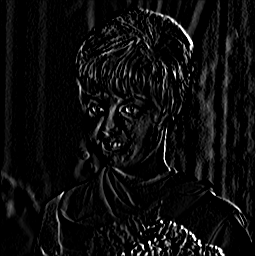

In [12]:
kernel = np.array([[1, 0, -1],
                    [2, 0, -2],
                    [1, 0, -1]])

convolved_image = convolution2d(img_gray, kernel, 1, 2)

cv2_imshow(convolved_image)

CANNY EDGE DETECTION

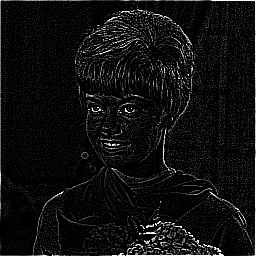

In [14]:
kernel = np.array([[-1, -1, -1],
                    [-1, 8, -1],
                    [-1, -1, -1]])
convolved_image = convolution2d(img_gray, kernel, 1, 2)

cv2_imshow(convolved_image)


PREWITT EDGE DETECTION

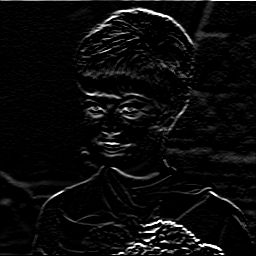

In [15]:
kernel = np.array([[-1, -1, -1],
                    [0, 0, 0],
                    [1, 1, 1]])
convolved_image = convolution2d(img_gray, kernel, 1, 2)

cv2_imshow(convolved_image)

5X5 GAUSSIAN BLUR

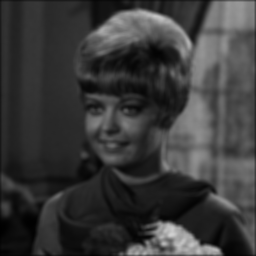

In [16]:
kernel_size = 5
sigma = math.sqrt(kernel_size)
gaussian_kernel = cv.getGaussianKernel(kernel_size, sigma)
gauss_kernel = gaussian_kernel @ gaussian_kernel.transpose()

convolved_image = convolution2d(img_gray, gauss_kernel, 1, 2)

cv2_imshow(convolved_image)


21X21 Gaussian Blur

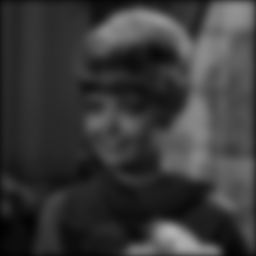

In [18]:
kernel_size = 21
sigma = math.sqrt(kernel_size)
gaussian_kernel = cv.getGaussianKernel(kernel_size, sigma)
gauss_kernel = gaussian_kernel @ gaussian_kernel.transpose()

convolved_image = convolution2d(img_gray, gauss_kernel, 1, 2)

cv2_imshow(convolved_image)


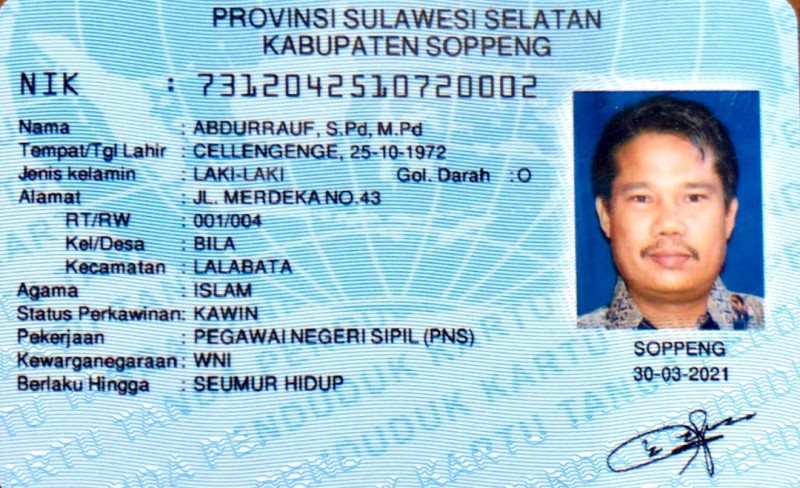

In [19]:
path1= '/content/drive/MyDrive/PCVK/KTP2.jpeg'

ktp1=cv.imread(path1)
cv2_imshow(ktp1)

TUGAS

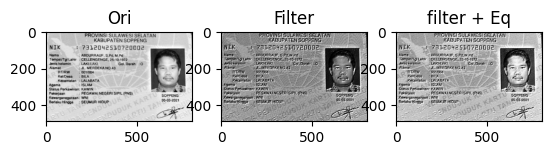

In [31]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Baca citra
image = cv2.imread(path1, cv2.IMREAD_GRAYSCALE)

# Buat kernel untuk filtering
kernel = np.array([[-2, -1, 0],
                    [-1, 1, 1],
                    [0, 1, 2]])

# Terapkan kernel ke citra
filtered = cv2.filter2D(image, -1, kernel)

# Hitung histogram dari citra hasil histogram equalization
histogram = cv2.calcHist([filtered], [0], None, [256], [0, 256])

# Normalisasi histogram
cdf = histogram.cumsum()
cdf_normalized = cdf * 255 / cdf[-1]

mapping = cdf_normalized.astype('uint8')

equalized_image = mapping[filtered]

# Menampilkan citra asli
plt.subplot(131)
plt.imshow(image, cmap='gray')
plt.title('Ori')

# Menampilkan citra hasil histogram equalization
plt.subplot(132)
plt.imshow(equalized_image, cmap='gray')
plt.title('Filter')

# Menampilkan citra setelah filtering + histogram equalization
plt.subplot(133)
plt.imshow(filtered, cmap='gray')
plt.title('filter + Eq')

plt.show()